In [1]:
# 일단 2015데이터로 학습, 예측

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu.head(3)

,년도,시도,시군구,지역,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,화재,교통,자연재해,범죄,안전사고,자살,감염병
0,2015,강원도,강릉시,2015_강원도_강릉시,1161.45445,121.96083,0.04634,0.13901,25.67109,2.03886,1559476.199,37.53354,335.85565,0.02344,0.37070,1668.57424,58.84888,0.00457,77.36,228.30585,392.99003,0.83408,0.04634,0.00641,0.64111,32.34371,44.85489,2.22421,12.51118,0.41704,314.30862,108.15219,36.42143,0.32436,0.02316,2.31551,660.14293,0.13173,13.17299,404.29643,53.98342,22.52012,4.63377,0.50971,1.29746,0.55605,0.50971,0.13901,0.00000,48.65458,68.02374,108.61557,309.39682,19.69352,0.00000,0.00000,0.08170,229.04725,99.99013,0.00176,4.90,-37.53354,23.2,2.25,773.56156,598.26604,406.61332,191.65273,2.0,9931.42020,47.9,27.61727,0.00000,98.65296,89.98781,76.78157,4.7,73.9,59.8,0.00471,0.47098,70.20162,201.29097,489.55780,53.98342,14.78173,458.83590,222.69899,224.83052,6229719.750,0.41704,21.91773,0.09268,209.07,32.2,0.80524,4428.91102,3.66068,0.00231,0.0,0.0,5886.61005,0.0,0.04634,605.49472,2261.65046,17.39,64.61,2.27055,0.00123,0.12303,53.56638,300.31463,99.4,0.01616,215807.0,1283.55429,2266.60859,5034.96179,1200.47079,0.741,4.0,0.438,0.553,59.98,7.08967,4.68011,522.87461,2564.56000,1371.82761,0.78774,1.52914,0.02068,2.06752,0.02235,0.50971,0.55605,1.62182,0.07086,1040.37773,9.91627,10.79668,0.09268,72985.02829,0.88042,1.57548,0.17458,271425.0696,1,0,1,1,1,1,1
1,2015,강원도,고성군,2015_강원도_고성군,1019.52493,89.86091,0.00000,0.66074,18.50078,1.32148,1845619.941,55.50233,320.12951,0.01056,1.65186,2275.59549,155.93512,0.00032,60.11,173.44478,328.71915,2.31260,0.00000,0.01319,1.31902,71.69051,86.55720,5.94668,14.86670,6.93779,417.91932,173.11441,33.03710,1.65186,0.01407,1.40675,273.77582,0.38895,38.89485,560.63960,52.52899,4.95557,2.64297,0.33037,1.98223,0.33037,0.33037,0.66074,0.00000,23.12597,63.10086,0.00000,203.83891,15.19707,0.00000,0.00000,0.07563,622.08861,37.14953,0.00059,3.44,-2.64297,29.8,0.54,172.12329,1212.79197,639.26790,573.52407,0.6,8314.44712,50.7,28.08154,0.00000,71.36014,94.81648,162.21216,3.9,56.4,64.6,0.00669,0.66858,52.19862,193.92778,395.45409,52.52899,14.53632,1014.23899,187.32036,191.28481,4181780.700,0.00000,28.08154,0.66074,46.31,28.5,0.83098,4079.75156,3.63408,0.00318,0.0,0.0,3766.07221,0.0,0.00000,764.47851,2672.37107,8.00,55.90,4.95557,0.00141,0.14067,57.81493,313.19171,109.2,0.00447,30269.0,896.95728,2948.56123,4678.71420,885.39430,0.752,2.0,0.746,0.524,71.80,11.89336,1.98223,344.57696,2491.98850,1384.91526,0.66074,0.00000,0.01696,1.69566,0.13449,1.32148,1.32148,4.62519,0.14102,661.09930,29.73339,19.49189,0.00000,129569.85700,0.66074,17.84003,0.14787,0.0000,0,0,0,0,0,0,0
2,2015,강원도,동해시,2015_강원도_동해시,922.56932,116.11430,0.10575,0.10575,27.28369,1.37476,1600156.3

In [12]:
sigungu_y = sigungu.iloc[:,-7:]
sigungu_x_15 = sigungu.iloc[:,4:-7]
sigungu_name_15 = sigungu.iloc[:,:4]
# sigungu_x_14 = sigungu_2.iloc[:,4:-7]
# sigungu_name_14 = sigungu_2.iloc[:,:4]

### 표준화

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# sigungu_x_14scaled = scaler.fit_transform(sigungu_x_14)
sigungu_x_15scaled = scaler.fit_transform(sigungu_x_15)

In [14]:
# sigungu_x_14scaled = pd.DataFrame(data = sigungu_x_14scaled)
sigungu_x_15scaled = pd.DataFrame(data = sigungu_x_15scaled)
# sigungu_x_14scaled.columns = sigungu_x_14.columns
sigungu_x_15scaled.columns = sigungu_x_15.columns
# sigungu_x_14scaled.shape,
sigungu_x_15scaled.shape

(226, 144)

### 스코어함수들
    - kfold_crossvalscore(): kfold의 평균 스코어들을 한번에 출력되도록 함
    - metric_score(): 분류메트릭을 이용한 스코어들을 한번에 출력되도록 함
    - paper(): 얼만큼 맞췄는지 확인해보려고
    - confusion_matrix
    - classification report
    - model.score()

스코어나오는 함수 설정

In [20]:
#교차검증 실험 crossvalscore이용
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(3, shuffle=True, random_state=0)
def KFold_meanscore(ary):
    tot = 0
    for i in ary:
        tot += i
    return print(tot/len(ary),ary)
def kfold_crossvalscore(model, X, y, cv=cv):
    ary1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    ary2 = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    ary3 = cross_val_score(model, X, y, cv=cv, scoring='precision')
    ary4 = cross_val_score(model, X, y, cv=cv, scoring='recall')
    print(f'f1-score:{KFold_meanscore(ary1)}')
    print(f'accuracy:{KFold_meanscore(ary2)}')
    print(f'precision:{KFold_meanscore(ary3)}')
    print(f'recall:{KFold_meanscore(ary4)}')

In [21]:
#분류메트릭이용
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def metric_score(y, pred):
    print(f'f1 :\t\t{f1_score(y,pred)}')
    print(f'accuracy :\t{accuracy_score(y,pred)}')
    print(f'precision :\t{precision_score(y, pred)}')
    print(f'recall :\t{recall_score(y, pred)}')

In [22]:
#정답지
def paper(y, pred):
    a = pd.DataFrame(data=pred,columns=['예측'])
    b = pd.DataFrame(data=y)
    return pd.concat([a,b],axis=1)

In [18]:
#confusion matrix
confusion_matrix = pd.crosstab(sido.감염병, pred_mlp, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

NameError: name 'sido' is not defined

In [19]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(sido_y.감염병,pred_mlp, target_names=['123','45']))

NameError: name 'sido_y' is not defined

# MLP

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(sigungu_x_15scaled, sigungu_y.감염병) #15로학습
pred_mlp = mlp.predict(sigungu_x_15scaled) #15로예측

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [36]:
mlp.score(sigungu_x_15scaled, sigungu_y.감염병) #모델에 트레이닝셋을 적용했을때 평균정확도(accuracy) 반환

0.9911504424778761

In [37]:
confusion_matrix = pd.crosstab(sigungu_y.감염병, pred_mlp, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
True,,,
0,144,2,146
1,0,80,80
All,144,82,226


In [40]:
#crossvalscore이용
kfold_crossvalscore(mlp, sigungu_x_15scaled, sigungu_y.감염병)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklea

0.678940346864875 [0.67924528 0.69090909 0.66666667]
f1-score:None
0.7832163742690058 [0.77631579 0.78666667 0.78666667]
accuracy:None
0.7277578653922739 [0.61290323 0.7037037  0.86666667]
precision:None
0.6485150282001856 [0.82608696 0.65517241 0.46428571]
recall:None


C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
#분류메트릭이용
metric_score(sigungu_y.감염병, pred_mlp)

f1 :		0.9876543209876543
accuracy :	0.9911504424778761
precision :	0.975609756097561
recall :	1.0


In [42]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(sigungu_y.감염병,pred_mlp, target_names=['123','45']))

              precision    recall  f1-score   support

         123       1.00      0.99      0.99       146
          45       0.98      1.00      0.99        80

    accuracy                           0.99       226
   macro avg       0.99      0.99      0.99       226
weighted avg       0.99      0.99      0.99       226



In [43]:
#정답지
paper(sigungu_y.감염병, pred_mlp)

,예측,감염병
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
221,1,1
222,0,0
223,0,0
224,0,0


# RFC

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_rfc = rfc.predict(sigungu_x_14scaled)

NameError: name 'sigungu_x_14scaled' is not defined

In [45]:
metric_score(sigungu_y.감염병, pred_rfc)

NameError: name 'pred_rfc' is not defined

In [46]:
confusion_matrix = pd.crosstab(sigungu_y.감염병, pred_rfc, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

NameError: name 'pred_rfc' is not defined

# XGB

In [96]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10, n_estimators=200, learning_rate=0.01)
xgb.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_xgb = xgb.predict(sigungu_x_14scaled)

In [97]:
metric_score(sigungu_y.감염병, pred_xgb)

f1 :		0.9090909090909091
accuracy :	0.9411764705882353
precision :	1.0
recall :	0.8333333333333334


In [98]:
confusion_matrix = pd.crosstab(sigungu_y.감염병, pred_xgb, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
True,,,
0,11,0,11
1,1,5,6
All,12,5,17


# LGBM

In [38]:
from lightgbm import LGBMClassifier
import copy#lgbm은 아스키 코드값만 입력받기 때문에 한글을 다 숫자로 바뀌주기
lgbm_sigungu = b = copy.deepcopy(sigungu_x_scaled) 
lgbm_sigungu.columns = list(range(163))
lgbm= LGBMClassifier(n_estimators=200,num_boost_round =500,learning_rate =0.01)
lgbm.fit(lgbm_sigungu, sigungu.감염병)
pred_lgbm = lgbm.predict(sigungu_x_scaled)

C:\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


# SVC

In [99]:
from sklearn.svm import SVC
svc = SVC(gamma=0.0001, C=3000, probability=True)
svc.fit(sigungu_x_15scaled, sigungu_y.감염병)
pred_svc = svc.predict(sigungu_x_14scaled)

In [100]:
print(classification_report(sigungu_y.감염병,pred_svc, target_names=['123','45']))

              precision    recall  f1-score   support

         123       1.00      1.00      1.00        11
          45       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [101]:
confusion_matrix = pd.crosstab(sigungu_y.감염병, pred_svc, rownames=['True'], colnames=['Predicted'], margins=True)
confusion_matrix

Predicted,0,1,All
True,,,
0,11,0,11
1,0,6,6
All,11,6,17


# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(sigungu_x_scaled, sigungu.감염병)
pred_lr = lr.predict(sigungu_x_scaled)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [42]:
print(classification_report(sigungu.감염병,pred_lr, target_names=['123','45']))

              precision    recall  f1-score   support

         123       1.00      1.00      1.00        11
          45       1.00      1.00      1.00         6

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



# Perceptron

In [74]:
from sklearn.linear_model import Perceptron
pcp = Perceptron()
pcp.fit(sigungu_x_scaled, sigungu.감염병)
pred_pcp = pcp.predict(sigungu_x_scaled)

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(sigungu_x_scaled, sigungu.감염병)
pred_dtc = pcp.predict(sigungu_x_scaled)

# AUC / ROC

In [80]:
#AUC: AreaUnderCurve는 1에 가까울 수록 좋음
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(sigungu.감염병, lr.decision_function(sigungu_x_scaled))
fpr2, tpr2, thresholds2 = roc_curve(sigungu.감염병, svc.decision_function(sigungu_x_scaled))
fpr3, tpr3, thresholds3 = roc_curve(sigungu.감염병, pcp.decision_function(sigungu_x_scaled))
#no mlp, xgb, dtc, lgbm, rfc

In [79]:
from sklearn.metrics import auc
auc(fpr1,tpr1), auc(fpr2, tpr2), auc(fpr3, tpr3)
#auc of model1, auc of model2

(1.0, 1.0, 1.0)

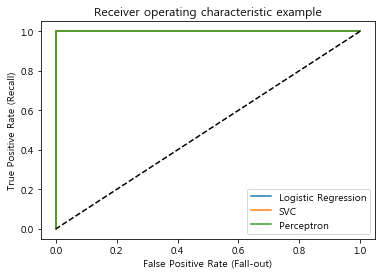

In [82]:
#roc커브 시각화
plt.title('Receiver operating characteristic example')
plt.xlabel('False Positive Rate (Fall-out)')
plt.ylabel('True Positive Rate (Recall)')
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='SVC')
plt.plot(fpr3, tpr3, label='Perceptron')
plt.legend()

plt.plot([1,0],[1,0],'k--',label='random gu ess') ## 수정해야됨

# GridSearchCV

In [ ]:
from sklearn.feature_selection import SelectKBest
model_kbest = SelectKBest()
from sklearn.pipeline import Pipeline

### cv: MLP

In [ ]:
pipe_mlp = Pipeline([("kbest", model_kbest),('mlp',mlp)])
#파라미터 생성
params_mlp = {"kbest__k":[163],
          "mlp__hidden_layer_sizes": [(50,30),(20,40,20),(30,50)],
         "mlp__learning_rate": [0.01,0.05]}

In [ ]:
grid_search = GridSearchCV(pipe_mlp, param_grid = params_mlp,
                          cv=3, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(sigungu_x_scaled, sigungu.감염병)
mlp_grid = grid_search.best_estimator_
mlp_grid

### cv: RFC

In [ ]:
pipe_rfc = Pipeline([("kbest", model_kbest),('rfc',rfc)])
#파라미터 생성
params_rfc = {"kbest__k":[163],
          "rfc__max_depth": [10,15,20,25],
         "rfc__learning_rate": [0.01,0.05],
         "rfc__n_estimators": [200,300,400,500]}

In [ ]:
grid_search = GridSearchCV(pipe_rfc, param_grid = params_rfc,
                          cv=3, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(sigungu_x_scaled, sigungu.감염병)
rfc_grid = grid_search.best_estimator_
rfc_grid

### cv: xgb

In [69]:
pipe_xgb = Pipeline([("kbest", model_kbest),('xgb',xgb)])
#파라미터 생성
params_xgb = {"kbest__k":[163],
          "xgb__max_depth": [10,15,20,25],
         "xgb__learning_rate": [0.01,0.05],
         "xgb__n_estimators": [200,300,400,500]}

In [70]:
grid_search = GridSearchCV(pipe_xgb, param_grid = params_xgb,
                          cv=3, n_jobs=-1, verbose=1)

In [71]:
grid_search.fit(sigungu_x_scaled, sigungu.감염병)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    1.6s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000000017AA70D0>)),
                                       ('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.01,
                                                      max_delta_step=0,
                                                      max_depth=10

In [72]:
xgb_grid = grid_search.best_estimator_
xgb_grid

Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=163,
                             score_func=<function f_classif at 0x0000000017AA70D0>)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.01,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [84]:
kfold_crossvalscore(xgb_grid, sigungu_x_scaled, sigungu.감염병)

C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [110] are constant.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [110] are constant.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [110] are constant.
  UserWarning)
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarn

0.38888888888888884 [0.5        0.         0.66666667]
f1-score:None
0.5333333333333333 [0.66666667 0.33333333 0.6       ]
accuracy:None
0.38888888888888884 [0.5        0.         0.66666667]
precision:None
0.38888888888888884 [0.5        0.         0.66666667]
recall:None


### cv: lgbm

In [73]:
#최적의 변수를 찾기 위한 KBest 함수 불러오기
#파이프라인 구축
pipe_lgbm = Pipeline([("kbest", model_kbest),('lgbm',lgbm)])
#파라미터 생성
params_lgbm = {"kbest__k":[163],
          "lgbm__max_depth": [15,20,25],
         "lgbm__learning_rate": [0.05],
         "lgbm__num_leaves": [15,20,25],
         "lgbm__n_estimators": [200,300,400,500],
         "lgbm__random_state": [42]}

In [65]:
#최적의 파라미터 탐색
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe_lgbm, param_grid = params_lgbm,
                          cv=3, n_jobs=-1, verbose=10)

In [66]:
grid_search.fit(sigungu_x_scaled, sigungu.감염병)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1860s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0834s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  60 out of 108 | elapsed:    2.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.3s finished
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kbest',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x0000000017AA70D0>)),
                                       ('lgbm',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.01,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_child_weight=0.001,...
                            

In [67]:
lgbm_grid = grid_search.best_estimator_
lgbm_grid

Pipeline(memory=None,
         steps=[('kbest',
                 SelectKBest(k=163,
                             score_func=<function f_classif at 0x0000000017AA70D0>)),
                ('lgbm',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.05, max_depth=15,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=200, n_jobs=-1,
                                num_boost_round=500, num_leaves=15,
                                objective=None, random_state=42, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

### cv: lr

In [85]:
pipe_lr = Pipeline([("kbest", model_kbest),('lr',lr)])
#파라미터 생성
params_lr = {"kbest__k":[163],
          "lr__tol": [0.0001,0.0005,0.001],
         "lr__max_iter": [50,100,150]}

### cv: dtc

### cv: pcp

### cv: pcp

### cv: svc